## Fetch data from https://coinmarketcap.com

In [1]:
#!pip install cryptocmd

In [2]:
from cryptocmd import CmcScraper
import pandas as pd 
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [3]:
scraper = CmcScraper("XRP", "15-01-2017", "25-10-2017")
headers, data = scraper.get_data()
json_data = scraper.get_data("json")
scraper.export("csv")
data = scraper.get_dataframe()
data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-10-25,0.207113,0.208237,0.201803,0.204604,75017504,7.883707e+09
1,2017-10-24,0.195567,0.217508,0.190455,0.206644,220080992,7.962311e+09
2,2017-10-23,0.203504,0.203919,0.190729,0.196928,99914800,7.587939e+09
3,2017-10-22,0.210958,0.211901,0.200722,0.204177,75849504,7.867254e+09
4,2017-10-21,0.210189,0.212381,0.200774,0.211016,116807000,8.130771e+09


In [4]:
data.shape

(284, 7)

In [5]:
data.describe()

,Open,High,Low,Close,Volume,Market Cap
count,284.000000,284.000000,284.000000,284.000000,2.840000e+02,2.840000e+02
mean,0.143552,0.152235,0.135286,0.144240,1.285402e+08,5.528748e+09
std,0.110108,0.116562,0.103185,0.109845,2.006204e+08,4.223503e+09
min,0.005419,0.005547,0.005372,0.005408,2.304790e+05,2.008690e+08
25%,0.009557,0.010462,0.009150,0.009975,5.854018e+06,3.729654e+08
50%,0.177878,0.183583,0.169176,0.177997,7.543350e+07,6.823907e+09
75%,0.227864,0.241366,0.215046,0.228997,1.637115e+08,8.775192e+09
max,0.394931,0.435170,0.332222,0.394132,1.770400e+09,1.509757e+10


In [6]:
df_close = data[['Date','Close']]
df_close.head(3)

,Date,Close
0,2017-10-25,0.204604
1,2017-10-24,0.206644
2,2017-10-23,0.196928


In [7]:
df_close = df_close.set_index('Date')
print ('before sort')
print (df_close.head(3))

df_close.sort_index(inplace=True)

print ('after sort')
print (df_close.head(3))

before sort
               Close
Date                
2017-10-25  0.204604
2017-10-24  0.206644
2017-10-23  0.196928
after sort
               Close
Date                
2017-01-15  0.006726
2017-01-16  0.006788
2017-01-17  0.006800


Text(0, 0.5, 'price in usd')

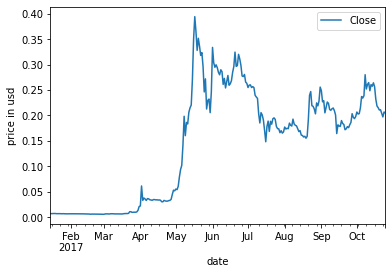

In [8]:
ax = df_close.plot()
ax.set_xlabel('date')
ax.set_ylabel('price in usd')

scale data for neural networks input

In [9]:
#scale data
scaler = MinMaxScaler()
df_close['scale'] = scaler.fit_transform(df_close['Close'].values.reshape(-1,1))
df_close['scale'].head()

Date
2017-01-15    0.003391
2017-01-16    0.003551
2017-01-17    0.003583
2017-01-18    0.003348
2017-01-19    0.004182
Name: scale, dtype: float64

Text(0, 0.5, 'price in usd')

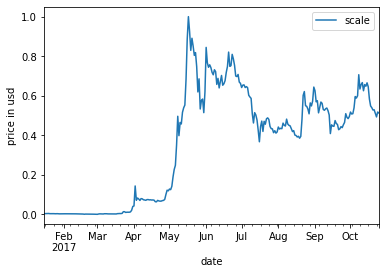

In [10]:
ax = df_close.plot(y='scale')
ax.set_xlabel('date')
ax.set_ylabel('price in usd')

In [11]:
#create historical data
def create_dataset(dataset, look_back=3):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)
x, y = create_dataset(df_close['scale'])
print (x.shape)
print (y.shape)

(280, 3)
(280,)


Text(0.5, 1.0, 'forcasting target')

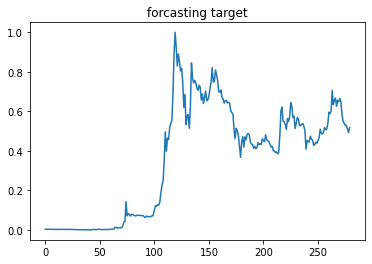

In [12]:
plt.plot(y)
plt.title('forcasting target')

create data training and testing

x_train (196, 3) [[0.00339133 0.00355054 0.00358264]
 [0.00355054 0.00358264 0.00334836]
 [0.00358264 0.00334836 0.00418243]
 [0.00334836 0.00418243 0.00326054]
 [0.00418243 0.00326054 0.00333833]] [0.00334836 0.00418243 0.00326054 0.00333833 0.0033576 ]
x_test (84, 3) [[0.4107647  0.41669179 0.44156035]
 [0.41669179 0.44156035 0.43142462]
 [0.44156035 0.43142462 0.43528082]
 [0.43142462 0.43528082 0.43304529]
 [0.43528082 0.43304529 0.46132756]] [0.43142462 0.43528082 0.43304529 0.46132756 0.45028375]


Text(0.5, 1.0, 'training forecasting target')

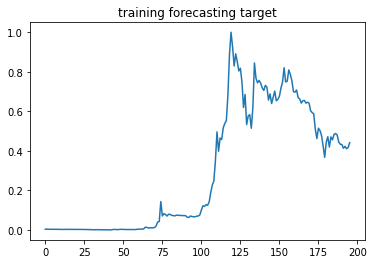

In [13]:
size = int(len(x) * 0.70)

x_train, x_test = x[0:size], x[size:len(x)]
y_train, y_test = y[0:size], y[size:len(x)]


print ('x_train',x_train.shape, x_train[:5],y_train[:5])
print ('x_test',x_test.shape, x_test[:5],y_test[:5])

plt.plot(y_train)
plt.title('training forecasting target')

## perform simple methods and evaluate using MSE

In [14]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import TweedieRegressor
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR

#clf = MLPRegressor(activation = 'tanh',solver='adam')
clf = LinearRegression()
#clf = linear_model.BayesianRidge()
#clf = TweedieRegressor(power=1, alpha=0.5, link='log')
#clf = linear_model.LassoLars(alpha=.1)
#clf = RandomForestRegressor(max_depth=2, random_state=0)
#clf = RidgeCV()
#clf = LinearSVR()
    

In [15]:
clf.fit(x_train,y_train)

train_mse = clf.predict(x_train)
test_mse = clf.predict(x_test)
print ('MSE training', mean_squared_error(train_mse,y_train))
print ('MSE testing', mean_squared_error(test_mse,y_test))

MSE training 0.0018237266000826085
MSE testing 0.0011700467963139316


result of training and visualization

Text(0.5, 1.0, 'training result')

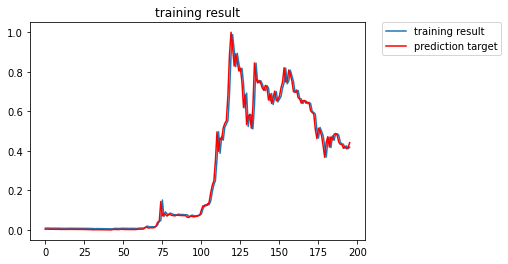

In [16]:
train_pred = clf.predict(x_train)
test_pred = clf.predict(x_test)

plt.plot(train_pred,label='training result')
plt.plot(y_train,color='red', label='prediction target')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('training result')

Text(0.5, 1.0, 'testing result')

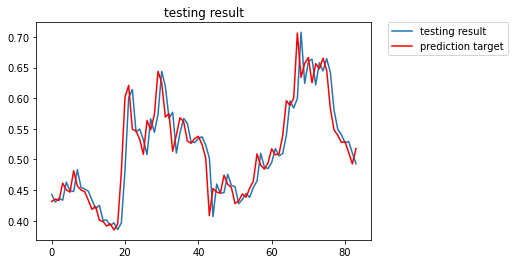

In [17]:
plt.plot(test_pred,label='testing result')
plt.plot(y_test,color='red',label='prediction target')
#plt.legend('test,prediction', ncol=2, loc='upper left');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('testing result')

inverse data and perform predict and visuzlization

Text(0.5, 1.0, 'training result with real number')

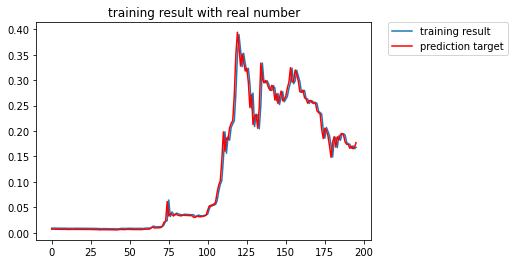

In [18]:
plt.plot(scaler.inverse_transform(train_pred.reshape(-1,1)),label='training result')
plt.plot(scaler.inverse_transform(y_train.reshape(-1,1)),color='red', label='prediction target')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('training result with real number')

Text(0.5, 1.0, 'testing result with real number')

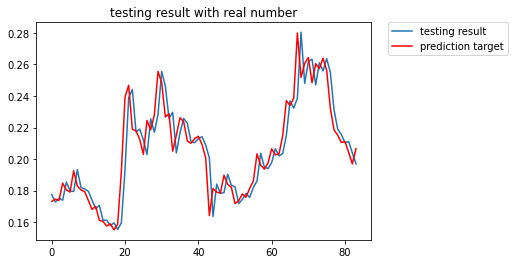

In [19]:
plt.plot(scaler.inverse_transform(test_pred.reshape(-1,1)),label='testing result')
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)),color='red', label='prediction target')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('testing result with real number')